# Jupyter notebook pour analyse d'un dataset 
Dataset extrait: https://data.gov.au/dataset/ds-dga-553b3049-2b8b-46a2-95e6-640d7986a8c1/details


## Import des packages nécéssaire aux traitements data

- Pandas


In [10]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('./dataset.csv')


## Affichage des 10 première lignes du dataset 

In [5]:
df.head()

,FacilityID,URL,Name,FacilityType,Address1,Town,State,AddressNote,Latitude,Longitude,...,Ambulant,Accessible,LHTransfer,RHTransfer,ToiletNote,SharpsDisposal,DrinkingWater,SanitaryDisposal,MensPadDisposal,Shower
0,1,https://toiletmap.gov.au/facility/1,Sandy Beach Reserve,Park or reserve,"Lost 15525, West Road",Bassendean,WA,NaN,-31.921836,115.950206,...,False,True,False,False,NaN,True,True,True,False,False
1,2,https://toiletmap.gov.au/facility/2,Point Reserve,Park or reserve,"Lot 197, North Road",Bassendean,WA,NaN,-31.904410,115.960991,...,False,True,False,False,NaN,True,True,True,False,False
2,3,https://toiletmap.gov.au/facility/3,Success Hill Reserve,Park or reserve,"Lot 2838, Seventh Avenue",Bassendean,WA,NaN,-31.896289,115.955781,...,False,True,False,False,NaN,True,True,True,False,True
3,4,https://toiletmap.gov.au/facility/4,Jubilee Reserve,Park or reserve,"Lot 6322, Robinson Road",Eden Hill,WA,NaN,-31.891474,115.940164,...,False,False,False,False,NaN,True,False,True,False,False
4,5,https://toiletmap.gov.au/facility/5,Ashfield Reserve,Park or reserve,"Lot 12061, 2 Coulston Road",Ashfield,WA,NaN,-31.913433,115.936477,...,False,True,False,False,NaN,True,True,True,False,False


## Quelques statistiques sur notre dataset 
### Afficher la liste des colonnes disponibles:

In [8]:
df.columns.tolist()

['FacilityID',
 'URL',
 'Name',
 'FacilityType',
 'Address1',
 'Town',
 'State',
 'AddressNote',
 'Latitude',
 'Longitude',
 'Parking',
 'ParkingAccessible',
 'ParkingNote',
 'KeyRequired',
 'MLAK24',
 'MLAKAfterHours',
 'PaymentRequired',
 'AccessNote',
 'AdultChange',
 'ChangingPlaces',
 'BYOSling',
 'ACShower',
 'ACMLAK',
 'AdultChangeNote',
 'BabyChange',
 'BabyCareRoom',
 'BabyChangeNote',
 'DumpPoint',
 'DPWashout',
 'DPAfterHours',
 'DumpPointNote',
 'OpeningHours',
 'OpeningHoursNote',
 'Male',
 'Female',
 'Unisex',
 'AllGender',
 'Ambulant',
 'Accessible',
 'LHTransfer',
 'RHTransfer',
 'ToiletNote',
 'SharpsDisposal',
 'DrinkingWater',
 'SanitaryDisposal',
 'MensPadDisposal',
 'Shower']

### Compter les valeurs d'une colonne 

In [11]:
df['FacilityType'].value_counts()

FacilityType
Park or reserve       9362
Other                 3715
Service station       2373
Sporting facility     1994
Shopping centre       1365
Community building     795
Car park               731
Camping ground         625
Train station          608
Rest area              540
Beach                  452
Food outlet            413
Caravan park           159
Cemetery               152
Airport                115
Bus station             92
Jetty                   80
Swimming pool           55
Park or Reserve         34
Train Station            3
Name: count, dtype: int64

In [13]:
df['Unisex'].value_counts()

Unisex
False    17925
True      5738
Name: count, dtype: int64

In [16]:
df['Town'].value_counts().head(10)

Town
Melbourne        64
Sydney           51
Adelaide         49
Coffs Harbour    43
Dubbo            42
Hamilton         41
Mildura          40
Emerald          35
Muswellbrook     35
Broken Hill      34
Name: count, dtype: int64

## Data visualisation avec MatplotLib
### Type d'installation

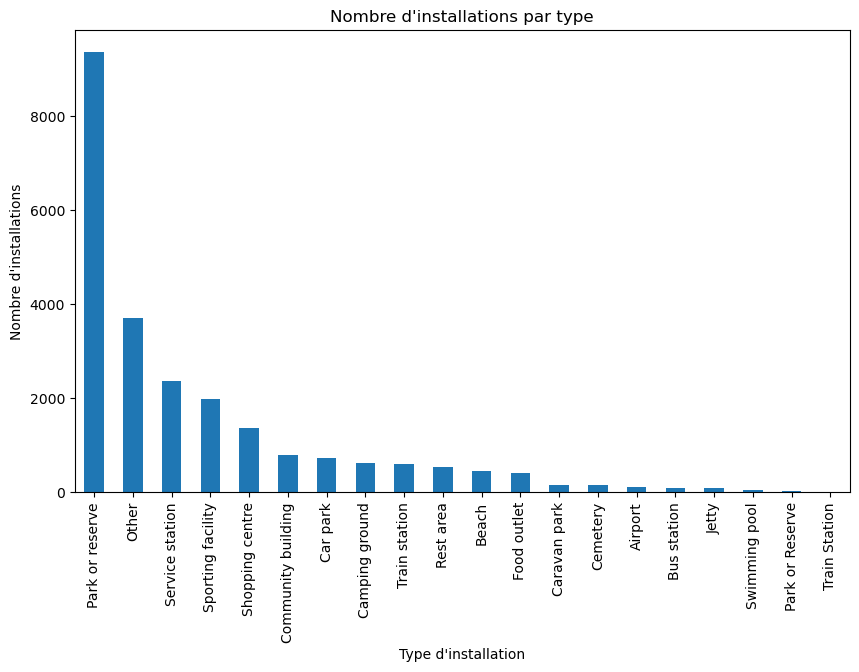

In [17]:
count_facility_types = df['FacilityType'].value_counts()

# Tracer l'histogramme
count_facility_types.plot(kind='bar', figsize=(10, 6))
plt.title('Nombre d\'installations par type')
plt.xlabel('Type d\'installation')
plt.ylabel('Nombre d\'installations')
plt.show()

### Map ou presque

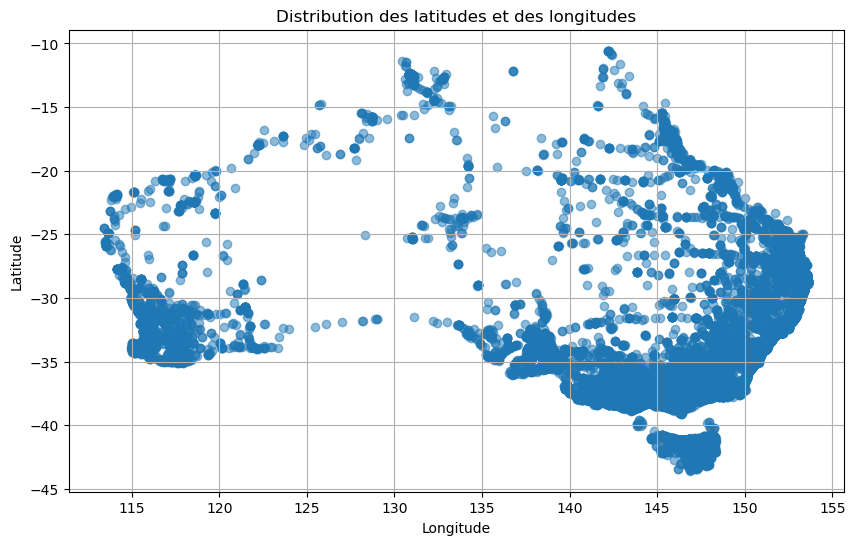

In [18]:
# Tracer le nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.title('Distribution des latitudes et des longitudes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


### Répartition par états

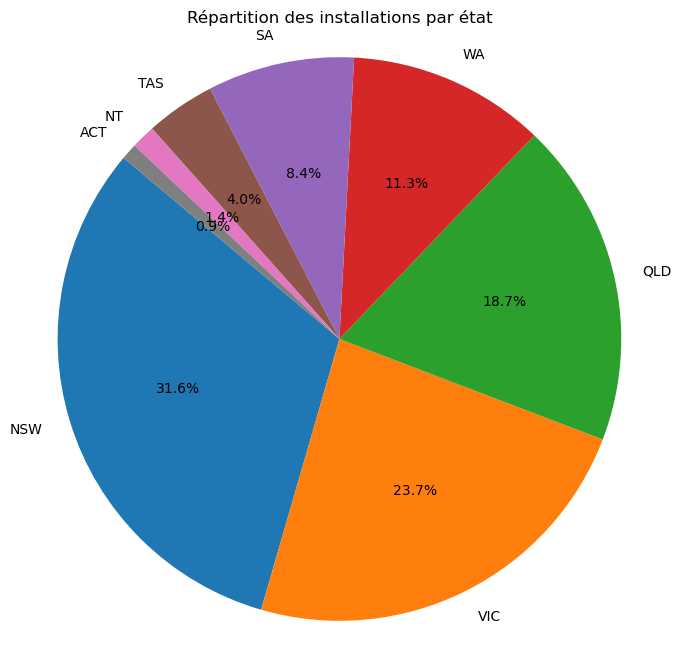

In [19]:
# Compter le nombre d'installations par état
count_by_state = df['State'].value_counts()

# Tracer le diagramme en secteurs
plt.figure(figsize=(8, 8))
plt.pie(count_by_state, labels=count_by_state.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des installations par état')
plt.axis('equal')
plt.show()


### Création d'une carte interactive
Documentation du module Folium: https://python-visualization.github.io/folium/latest/getting_started.html


In [33]:
import folium
from folium.plugins import MarkerCluster
import webbrowser
import os 

carte = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

marker_cluster = MarkerCluster().add_to(carte)

for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], 
                  popup=f"<b>{row['Name']}</b><br>{row['Address1']}<br>{row['Town']}, {row['State']}").add_to(marker_cluster)


carte.save('carte.html')
webbrowser.open('file://' +  os.getcwd()+ "/carte.html")


True

![title](./mapimg.png)
